<a href="https://colab.research.google.com/github/AlexsandroAmaro/analise-cluster-clientes-shopping/blob/main/Projeto_analise_de_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de Negócio

O objetivo é analisar uma base de dados de clientes que frequentam um shopping center para identificar grupos distintos com comportamentos e características semelhantes. Ao entender "quem são" nossos clientes, podemos sair de uma estratégia de marketing genérica para criar campanhas direcionadas, aumentando a eficácia das nossas ações e, consequentemente, o potencial de capitalização.

**A pergunta central é: Podemos agrupar nossos clientes em segmentos significativos para otimizar nossas estratégias de marketing?**

#Carregamento e Tratamento Inicial dos dados

Bibliotecas utilizadas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn



In [26]:
from sklearn.cluster import KMeans
model = KMeans()

Inicialmente, carreguei o conjunto de dados. Realizei um tratamento inicial, verificando a integridade das informações, a presença de valores nulos e o formato de cada coluna para garantir que a base estava pronta para a análise

In [5]:
mall_df = pd.read_csv(r"/content/sample_data/archive.zip")

In [6]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


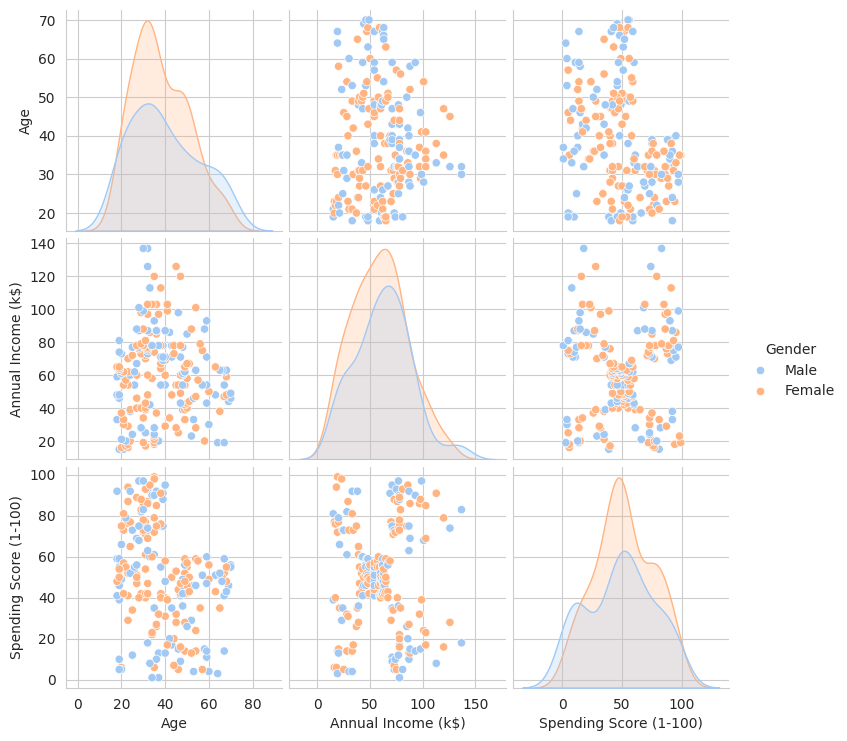

In [42]:
with sns.axes_style("whitegrid"):
  grafico = sns.pairplot(data= mall_df.drop("CustomerID",axis=1),hue="Gender", palette="pastel")

Para o objetivo de segmentação, nem todas as informações são igualmente importantes. Com base em uma análise inicial pelo grafico acima, é perceptivel que as características mais relevantes para agrupar os clientes de forma estratégica seriam:

1. Idade: Um fator demográfico crucial que influencia o comportamento de compr
2. Renda Anual (Renda): Indica o potencial financeiro do cliente.
3. Poder de Compra (Spending Score): Uma pontuação que o shopping atribui com base no comportamento de gasto do cliente (de 1 a 100).

A coluna Gênero, mostrou-se menos determinante para a separação dos grupos nesta base de dados específica e, por isso, foi deixada de fora do modelo para simplificar e focar nos fatores econômicos e demográficos mais impactantes.

In [17]:
clientes_df = mall_df[["Age","Annual Income (k$)", "Spending Score (1-100)"]]

In [19]:
clientes_df = clientes_df.rename(columns={"Annual Income (k$)":"Renda", "Age":"Idade", "Spending Score (1-100)":"Poder de compra"})
clientes_df.head()

,Idade,Renda,Poder de compra
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


#Modelagem: Criando os Clusters com K-Means

Com os dados preparados, utilizamos um modelo de Machine Learning não supervisionado para encontrar os agrupamentos.

/tmp/ipython-input-1220797108.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(


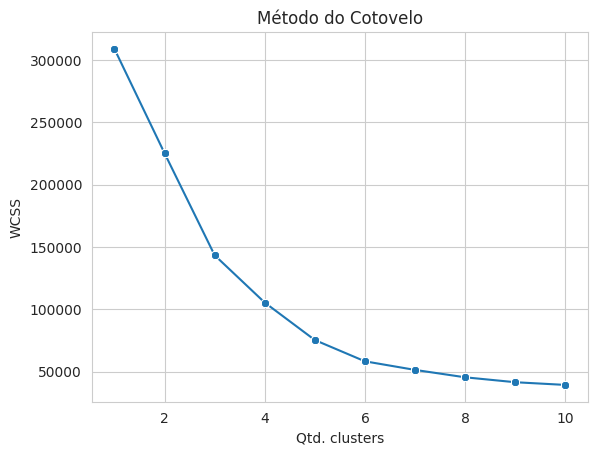

In [49]:
 wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(clientes_df)
  wcss.append(model.inertia_)
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(
      x=range(1, 11),
      y=wcss,
      marker="8",
      palette="pastel"
  )
  grafico.set(
      title='Método do Cotovelo',
      ylabel='WCSS',
      xlabel='Qtd. clusters'
  );

Definindo inicalmente 5 clusters, um número que pareceu suficiente para uma segmentação detalhada sem criar grupos demais. Aplicamos o modelo K-Means da biblioteca scikit-learn aos nossos dados.

In [27]:
model = sklearn.cluster.KMeans(n_clusters=5)
model = model.fit(clientes_df)

In [28]:
model.__dict__

{'n_clusters': 5,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['Idade', 'Renda', 'Poder de compra'], dtype=object),
 'n_features_in_': 3,
 '_tol': np.float64(0.05146879666666668),
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 1,
 'cluster_centers_': array([[32.69230769, 86.53846154, 82.12820513],
        [41.64705882, 88.73529412, 16.76470588],
        [33.39622642, 58.05660377, 48.77358491],
        [25.25      , 25.83333333, 76.91666667],
        [54.06      , 40.46      , 36.72      ]]),
 '_n_features_out': 5,
 'labels_': array([3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
        4, 3, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
        2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2,
        2, 2, 4, 2, 2, 2, 2, 

In [33]:
clusters = model.labels_
clusters = pd.DataFrame(clusters, columns=["Cluster"])
clusters.head()

,Cluster
0,3
1,3
2,4
3,3
4,4


In [34]:
clustered_df = pd.concat([clientes_df, clusters], axis=1)
clustered_df.head()

,Idade,Renda,Poder de compra,Cluster
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


In [36]:
clustered_df.shape

(200, 4)

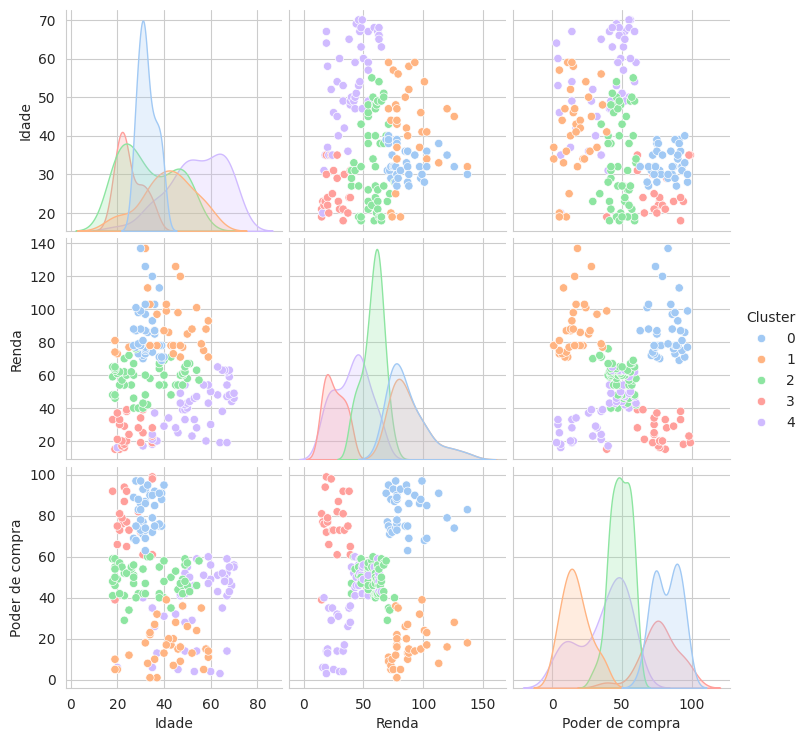

In [40]:
with sns.axes_style('whitegrid'):
  grafico = sns.pairplot(
  data=clustered_df,
  hue='Cluster',
  palette="pastel"
  )

O grafico de Poder de compra x Renda, consegue mostrar uma clara segregação de clusters, com essa agregação em mente, vamos analisar cada caso particular.

#Análise dos Resultados: Quem São Nossos Clientes

Cluster 1 (Laranja): "O Poupador Rico"

[Text(0.5, 1.0, 'Cluster 1 - Idade x Renda'),
 Text(0.5, 0, 'Idade(ano)'),
 Text(0, 0.5, 'Renda (anual milhares $)')]

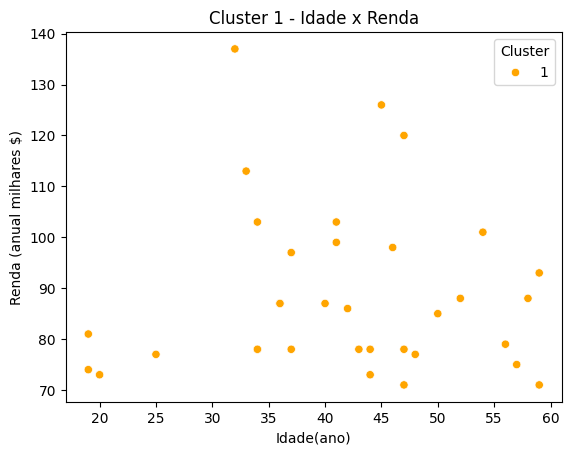

In [52]:
grafico = sns.scatterplot(
  data = clustered_df.query("Cluster==1"),
  x = "Idade",
  y = "Renda",
  hue= "Cluster",
  palette = ['orange']
 )
grafico.set(
    title="Cluster 1 - Idade x Renda",
    xlabel="Idade(ano)",
    ylabel="Renda (anual milhares $)"
    )

Perfil: Renda ALTA, mas Poder de Compra BAIXO.

Análise: Clientes que, apesar de terem dinheiro, são cautelosos e não gastam muito. Estratégias para este grupo devem focar em valor, qualidade e durabilidade. Promoções agressivas podem não funcionar; o marketing deve ser mais sutil e focado nos benefícios do produto.

Insight: A maioria dos clientes se concentram em idades maiores que 30 anos, é estrategico focar em campanhas para atingir essa faixa etária.

Cluster 2 (Verde): O Consumidor Padrão

[Text(0.5, 1.0, 'Cluster 2 - Idade x Renda'),
 Text(0.5, 0, 'Idade(ano)'),
 Text(0, 0.5, 'Renda (anual milhares $)')]

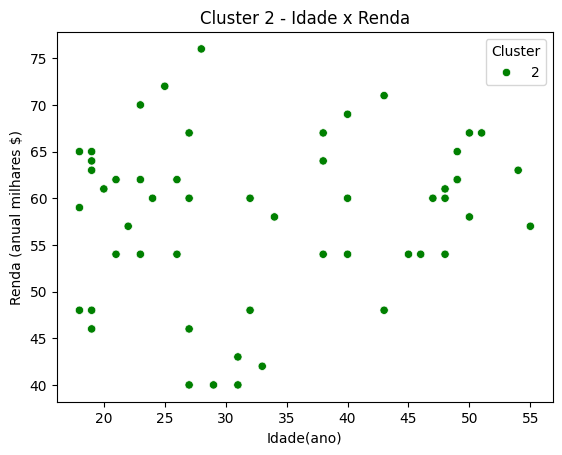

In [62]:
grafico = sns.scatterplot(
  data = clustered_df.query("Cluster==2"),
  x = "Idade",
  y = "Renda",
  hue= "Cluster",
  palette = ['green']
 )
grafico.set(
    title="Cluster 2 - Idade x Renda",
    xlabel="Idade(ano)",
    ylabel="Renda (anual milhares $)"
    )

Perfil: Renda MÉDIA e Poder de Compra MÉDIO.

Análise: Este é o grupo mais equilibrado e previsível. Representam o cliente "médio" do shopping. São sensíveis a promoções, campanhas de "custo-benefício" e novidades do mercado.

Insight: É um publico bem distribuido, talvez seja interessante dividir a campanha em dois grupos.
*   Grupo de ate 35 anos.
*   Grupo mais velho que 35 anos.



Cluster 3 (Vermelho): O Jovem Gastador

[Text(0.5, 1.0, 'Cluster 3 - Idade x Renda'),
 Text(0.5, 0, 'Idade(ano)'),
 Text(0, 0.5, 'Renda (anual milhares $)')]

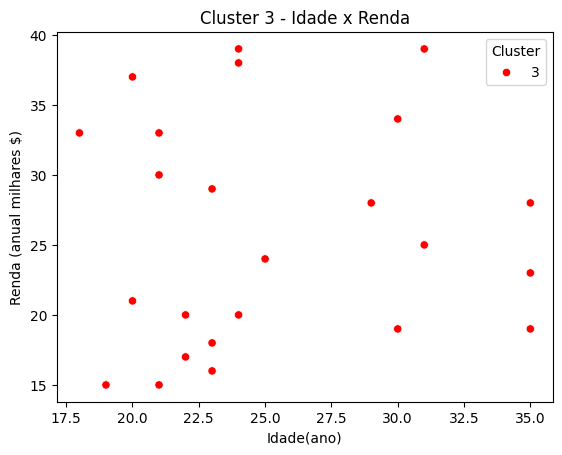

In [65]:
grafico = sns.scatterplot(
  data = clustered_df.query("Cluster==3"),
  x = "Idade",
  y = "Renda",
  hue= "Cluster",
  palette = ['red']
 )
grafico.set(
    title="Cluster 3 - Idade x Renda",
    xlabel="Idade(ano)",
    ylabel="Renda (anual milhares $)"
    )

Perfil: Renda BAIXA, mas Poder de Compra ALTO. São notavelmente mais jovens.

Análise: Provavelmente jovens adultos ou estudantes que gastam a maior parte de sua renda disponível em compras. São fortemente influenciados por tendências, redes sociais e fast-fashion. Campanhas virais e eventos no shopping são ideais para eles.

Cluster 4 (Roxo): O Econômico

[Text(0.5, 1.0, 'Cluster 4 - Idade x Renda'),
 Text(0.5, 0, 'Idade(ano)'),
 Text(0, 0.5, 'Renda (anual milhares $)')]

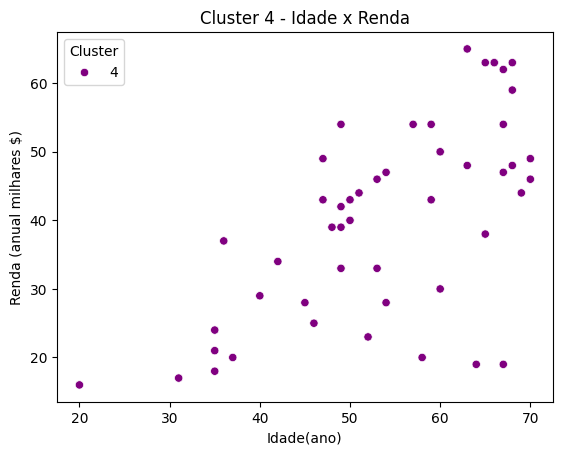

In [66]:
grafico = sns.scatterplot(
  data = clustered_df.query("Cluster==4"),
  x = "Idade",
  y = "Renda",
  hue= "Cluster",
  palette = ['purple']
 )
grafico.set(
    title="Cluster 4 - Idade x Renda",
    xlabel="Idade(ano)",
    ylabel="Renda (anual milhares $)"
    )

Perfil: Renda BAIXA/MÉDIA e Poder de Compra BAIXO. Tendem a ser mais velhos.

Análise: Este grupo é focado no essencial e muito sensível a preços. O marketing para eles deve ser direto, focado em descontos, liquidações e produtos de necessidade básica.

Cluster 0 (Azul): O Cliente Ideal

[Text(0.5, 1.0, 'Cluster 0 - Idade x Renda'),
 Text(0.5, 0, 'Idade(ano)'),
 Text(0, 0.5, 'Renda (anual milhares $)')]

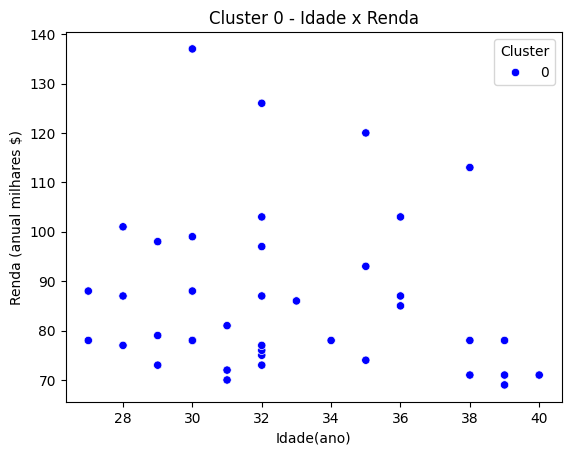

In [69]:
grafico = sns.scatterplot(
  data = clustered_df.query("Cluster==0"),
  x = "Idade",
  y = "Renda",
  hue= "Cluster",
  palette = ['blue']
 )
grafico.set(
    title="Cluster 0 - Idade x Renda",
    xlabel="Idade(ano)",
    ylabel="Renda (anual milhares $)"
    )

Perfil: Renda ALTA e Poder de Compra ALTO.

Análise: Este é o grupo mais valioso para o shopping. Eles têm capacidade financeira e demonstram disposição para gastar. São o alvo principal para produtos de luxo, programas de fidelidade e marketing de exclusividade.

#Conclusões Finais

A análise de clusterização foi um sucesso. Foi possível segmentar a base de clientes em 5 grupos distintos e acionáveis. Em vez de uma comunicação única, agora podemos criar as seguintes estratégias direcionadas:


1.   Para o "Cliente Ideal" (Cluster 0): Lançar um programa de fidelidade VIP com acesso antecipado a coleções e eventos exclusivos.

2. Para o "Poupador Rico" (Cluster 1): Enviar comunicações focadas em produtos de alto valor agregado, destacando qualidade e procedência.

3. Para o "Consumidor Padrão" (Cluster 2): Focar em campanhas de e-mail marketing com promoções sazonais e combos de produtos.

4. Para o "Jovem Gastador" (Cluster 3): Investir em marketing de influência nas redes sociais e organizar eventos como "encontros com influenciadores" no shopping.

5. Para o "Econômico" (Cluster 4): Criar um clube de descontos e focar a comunicação em ofertas e liquidações.




#Predição de novos clientes

Como o modelo está treinado, é possivel verificar em que grupo um novo cliente entraria.

Exemplo: Um cliente com 22 anos, 15.000 USD de renda anual e potencial de compra
 de 49

In [71]:
 cliente = np.array([22, 15, 49])

In [72]:
 cluster = model.predict(cliente.reshape(1, -1))
print(cluster)

[3]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Nesse exemplo, conclui-se que o cliente entraria do Cluster 3 (vermelho)